In [1]:
import matplotlib.pyplot as plt
import numpy as np
import data 
import models 
import plot_functions
from pymatreader import read_mat
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import nnmodels

## Initial 

In [2]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)


In [3]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X_norm)

##### Checker, is any trial flat?

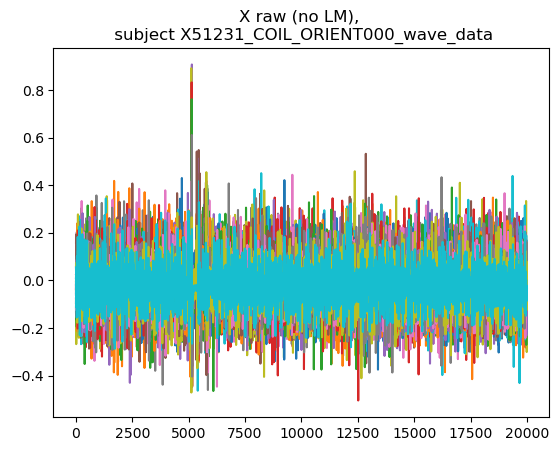

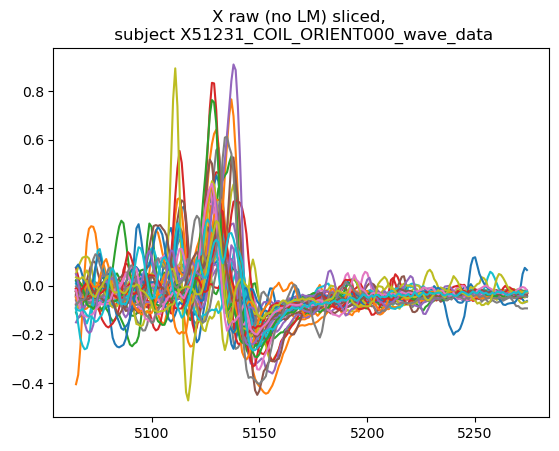

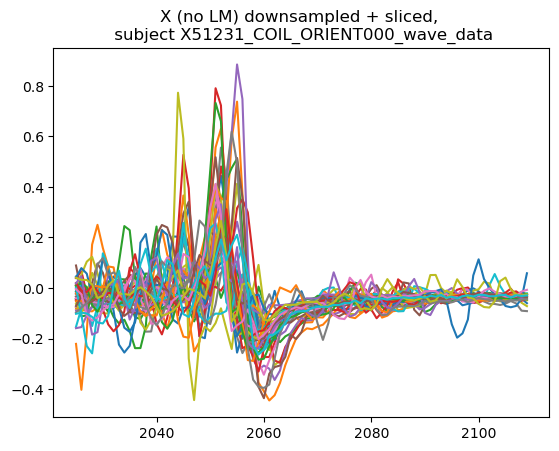

In [40]:
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X06188_coil_orient.mat"
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X51231_CoilOrientation.mat" #bliver meget spids
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X05398_coil_orient.mat" #bliver hakket ved downsampling
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X36523_ses-1_task-coilorientation_emg.mat"
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X86768_ses-1_task-coilorientation_run001_emg.mat"
data1 = read_mat(path)
if "sub" in path:
    key = list(data1.keys())[3]
else:
    key = list(data1.keys())[0]

X_raw = data1[key]['values'][:,0]
y = data1[key]['frameinfo']['state']
X_raw, y = data.delete_frames(X_raw,y) #X_raw her er det originale data for den path. slice det for at se signal

plt.title("X raw (no LM), \n subject "+str(key))
plt.plot(X_raw)
plt.show()
plt.title("X raw (no LM) sliced, \n subject "+str(key))
if "sub" not in path:
    plt.plot(np.arange(5065, 5275),X_raw[5065:5275])
else:
    plt.plot(np.arange(2065, 2275),X_raw[2065:2275])
plt.show()


# Downsample
if len(X_raw)==20000:
    downsampled_X_raw = []
    for i in range(len(X_raw[0])):
        downsampled_X_raw.append(data.downsample(np.transpose(X_raw)[i], 8000).tolist())
    downsampled_X_raw = np.transpose(downsampled_X_raw)
plt.title("X (no LM) downsampled + sliced, \n subject "+str(key))
if "sub" not in path:
    X_sliced = downsampled_X_raw[2025:2110]
    plt.plot(np.arange(2025, 2110),X_sliced)
else:
    X_sliced = downsampled_X_raw[4025:4110]
    plt.plot(np.arange(4025, 4110),X_sliced)


plt.show()



In [41]:
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X)

X_mean = X.mean(-1)
X_diff = np.diff(X)

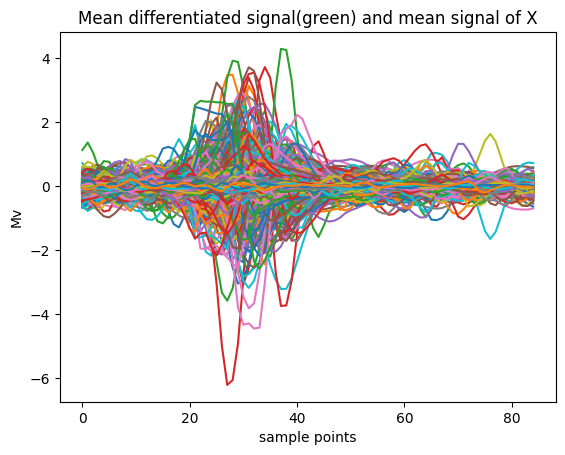

In [86]:
plt.plot(X_diff)
#plt.plot(X.mean(-1), color="blue")

# Add a title and labels to the plot
plt.title("Mean differentiated signal(green) and mean signal of X")
plt.xlabel("sample points")
plt.ylabel("Mv")

# Display the plot
plt.show()


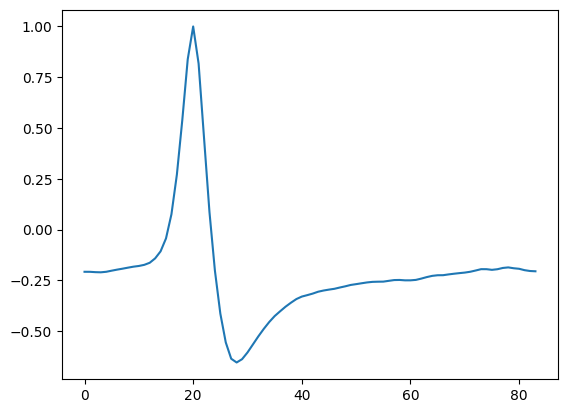

In [91]:
plt.plot(X_norm.mean(-1))

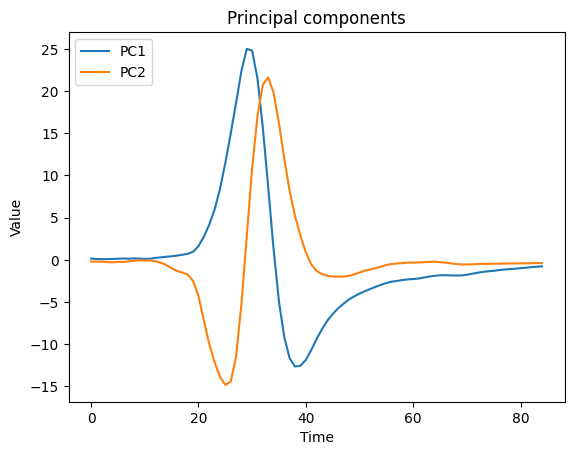

In [89]:
plot_functions.PCA(X, explained = False, n=2, PCAs = True)

In [42]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X_norm)


##### Visualizing X and X_norm

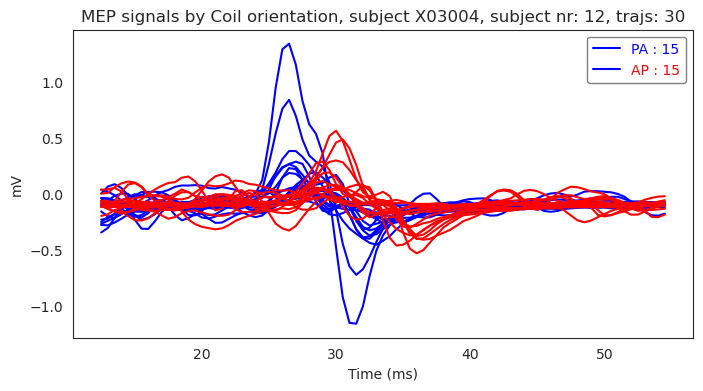

In [4]:
plot_functions.plot_subject_coil(X,y,list_subjects,groups,False,12)

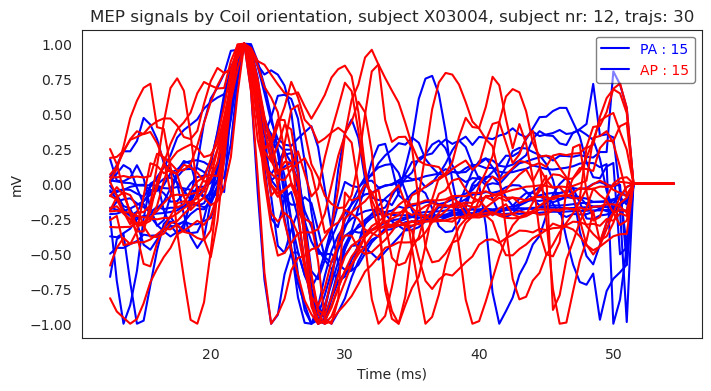

In [5]:
plot_functions.plot_subject_coil(X_norm,y,list_subjects,groups,False,12)

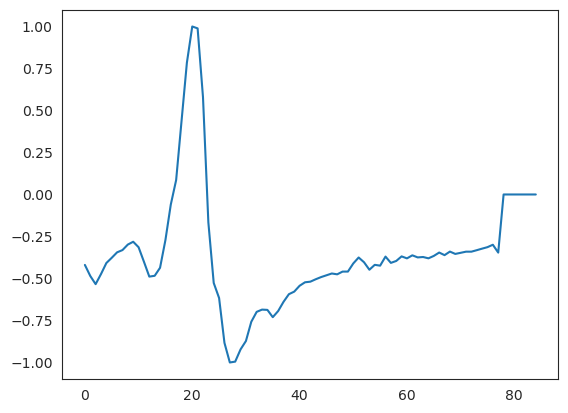

In [6]:
plt.plot(X_norm[:,2])

##### Plot specific subject

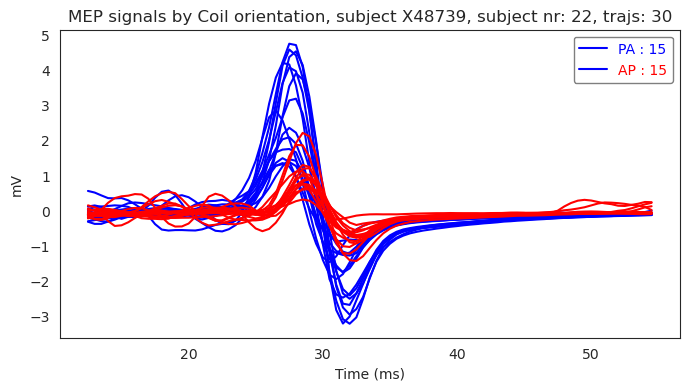

In [7]:
# Plot Specific groups
#plot_groups(X, groups, list_subjects=list_subjects, specifics = [5,18,19,31,32])

# Plot all subjects by coil orientations, PA and AP
#plot_coil(X,y, list_subjects, groups, mean = False, subject = None)

subject = 22 # set specific subject
plot_functions.plot_subject_coil(X,y,list_subjects,groups,mean=False,subject=subject)

### Logistic Regression models

0.9215988835725678
number of subjects: 38


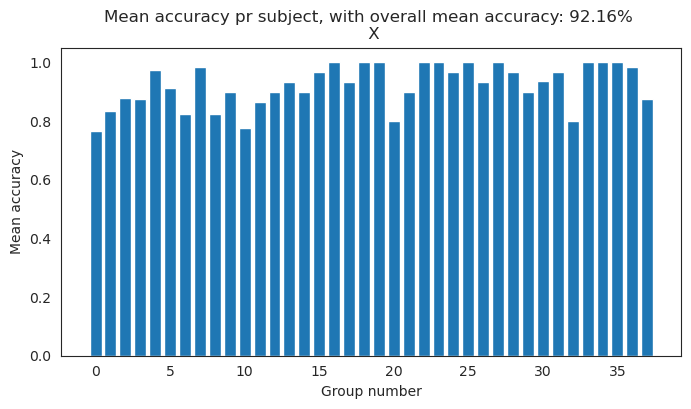

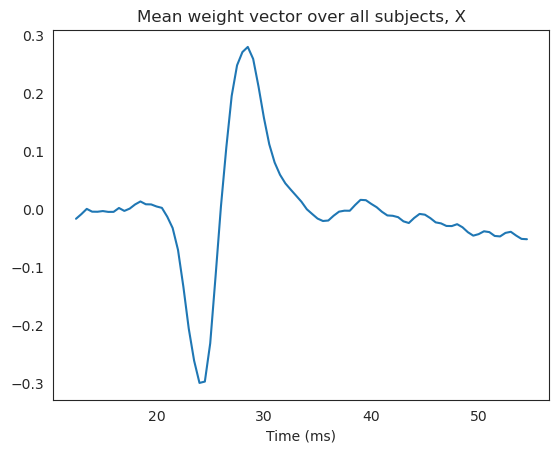

In [5]:
# 10-fold stratified cross validation PR SUBJECT
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6469816586921849
number of subjects: 38


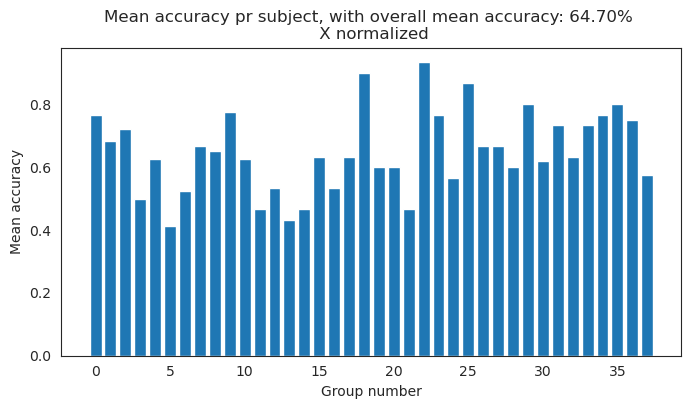

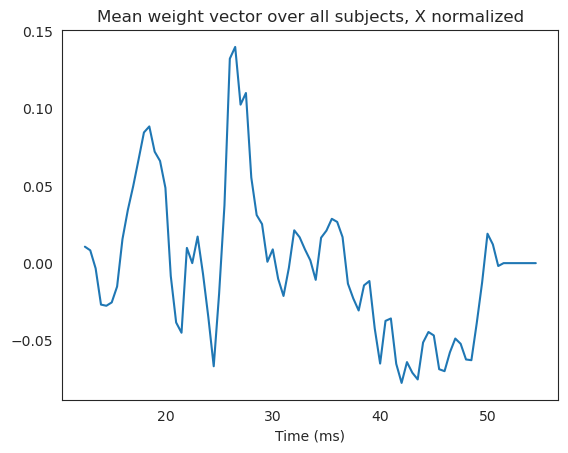

In [8]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT on X normalized
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.9242384370015949
number of subjects: 38


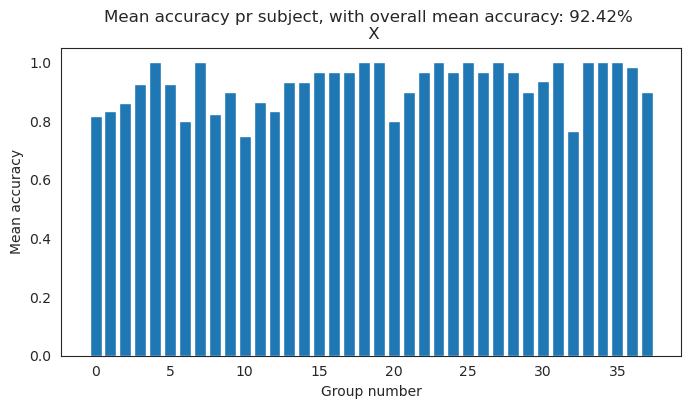

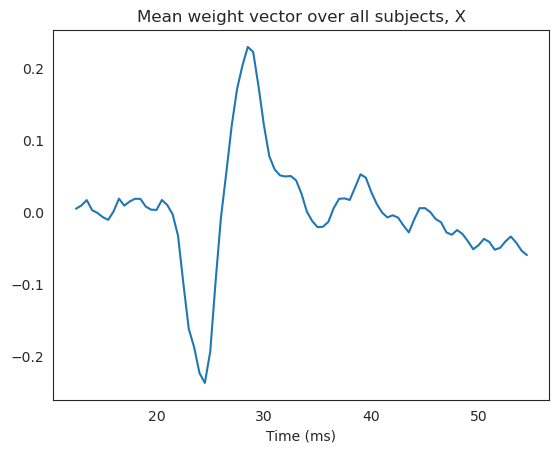

In [7]:
# 10-fold stratified cross validation PR SUBJECT SVM!
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6487240829346094
number of subjects: 38


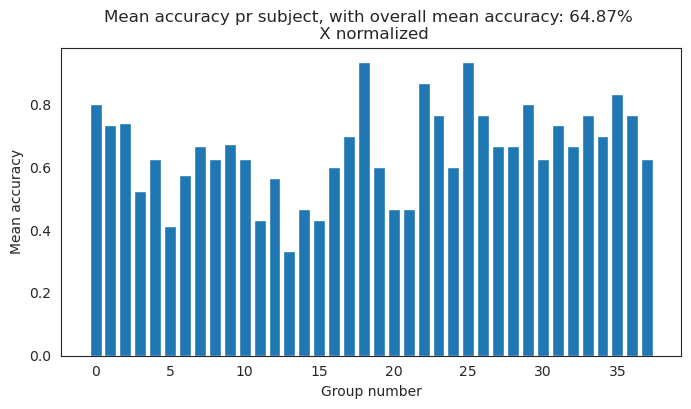

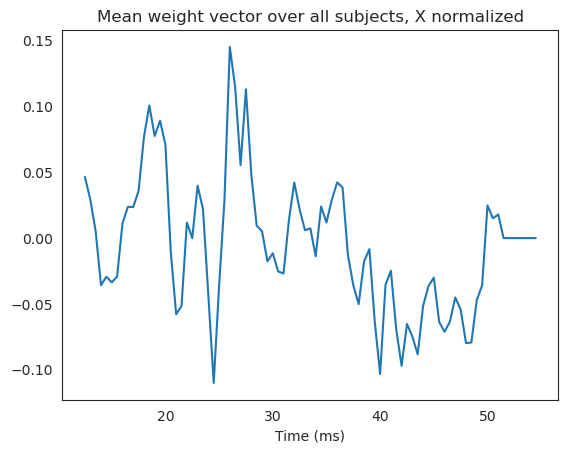

In [9]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT SVM! NORMALIZED
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


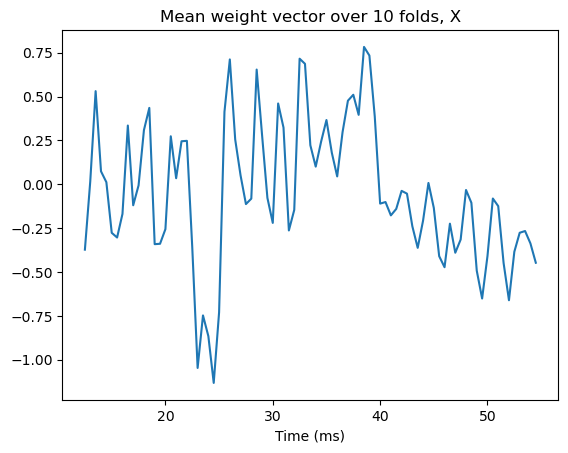

In [14]:
# General log reg model 10fold cv
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))


Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

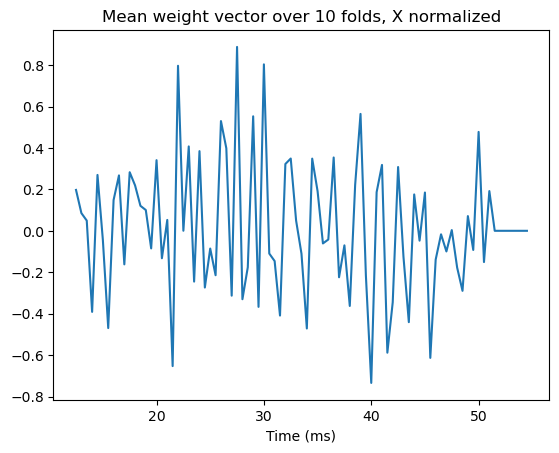

In [15]:
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


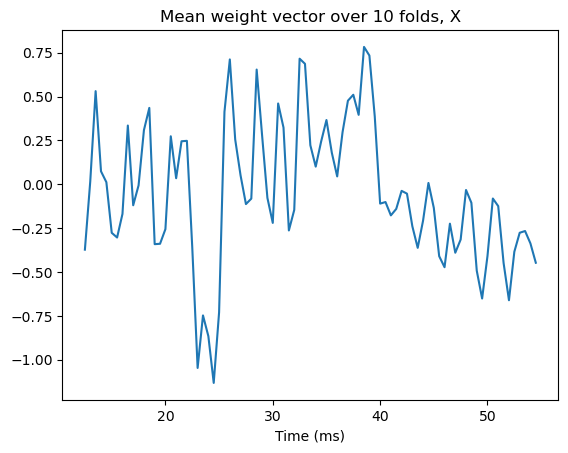

In [17]:
# General svm model 10fold cv X
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

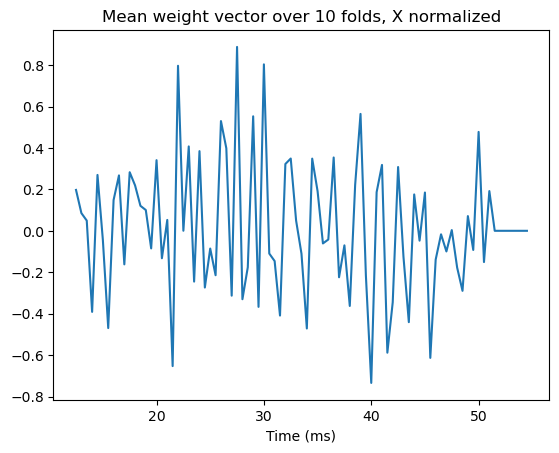

In [16]:
# SVM generel X normalized
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

##### Differentiate

In [ ]:
# Diffentiate X, Note that the first element of each row will be lost after differentiation since there is no previous element to calculate the difference with.    X_diff = np.diff(X, axis=1)
X_diff = np.diff(X, axis=1)

##### FFT
For other representation of the data

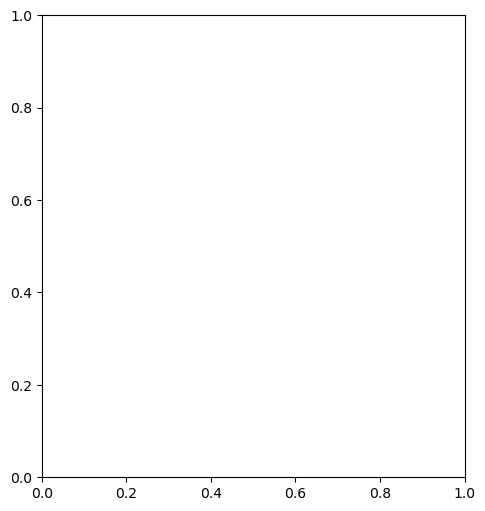

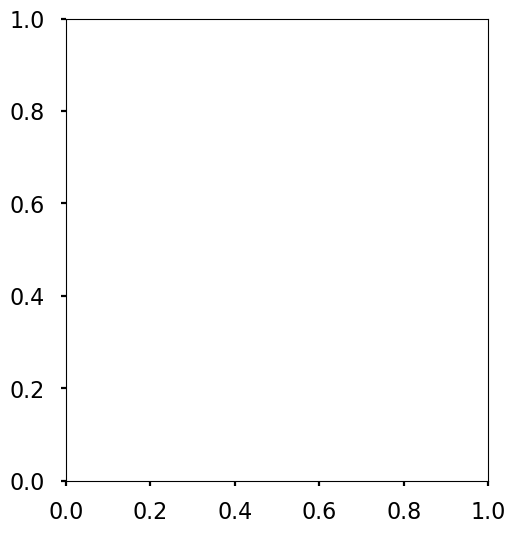

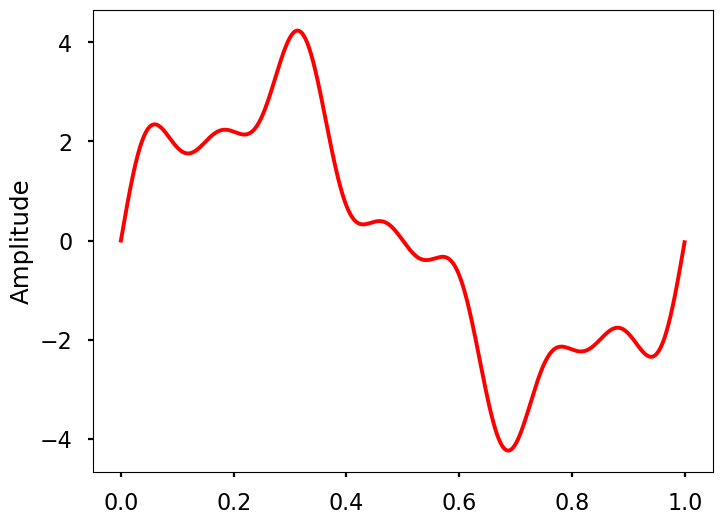

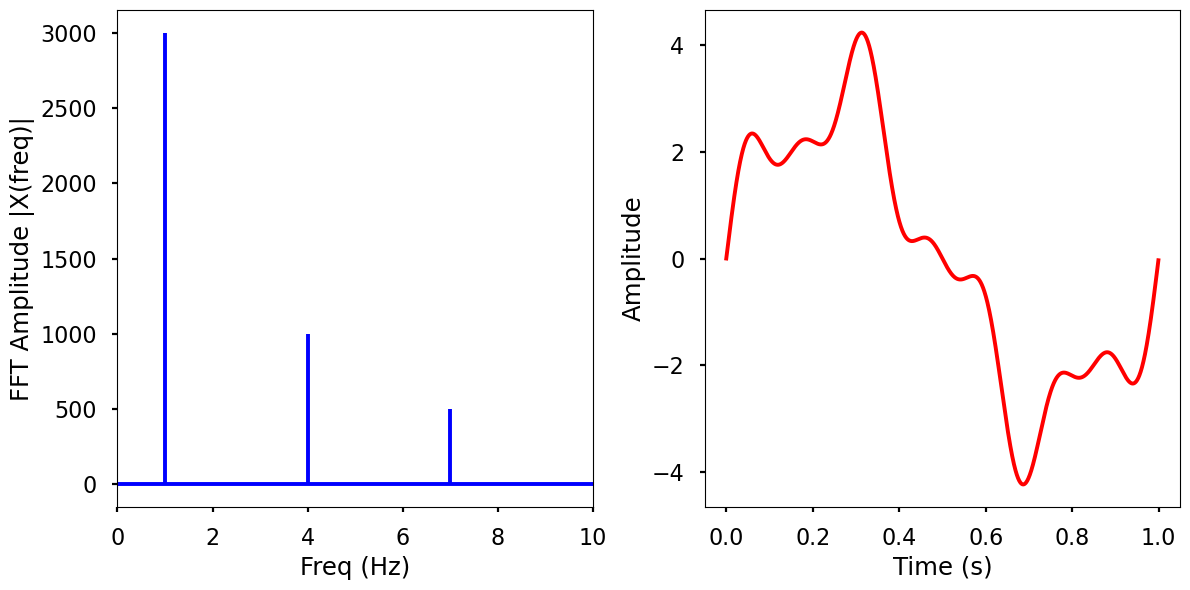

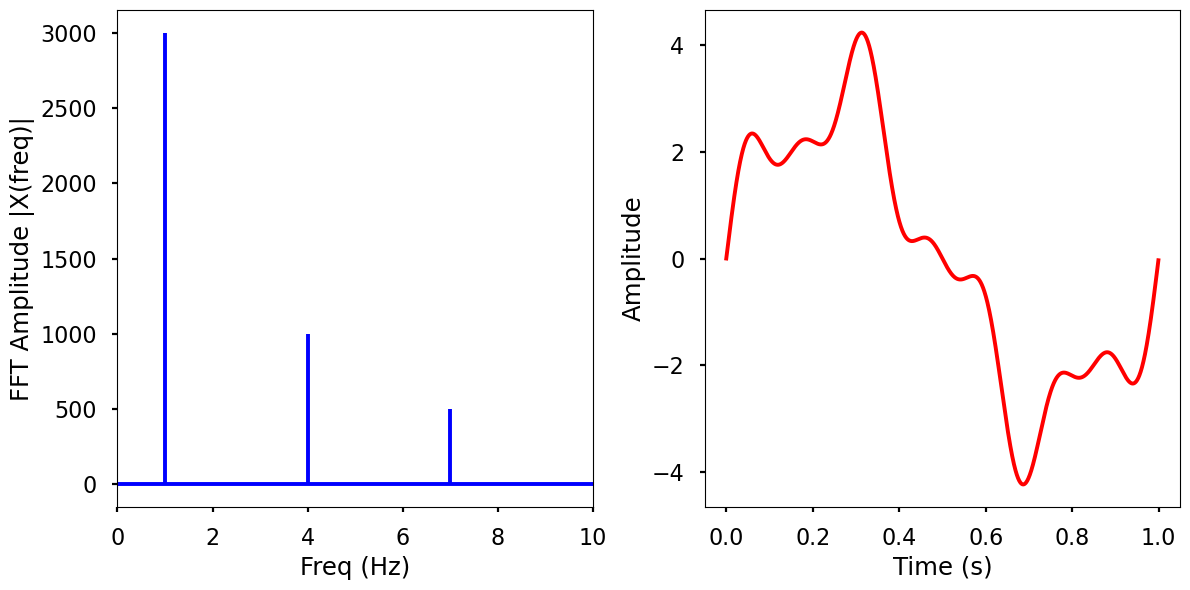

In [ ]:

from scipy.fftpack import fft, ifft
def FFT(X):
    plt.style.use('seaborn-poster')
    sr = 2000  # Sample rate (Hz)
    ts = 1.0/sr # sampling interval
    t = np.arange(0,1,ts)

    X = fft(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(t, ifft(X), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    '''

    for i in range(np.transpose(X).shape[0]):
        # Compute the power spectrum for signal i
        ps = np.abs(np.fft.rfft(np.transpose(X)[i])) ** 2
        
        # Compute the corresponding frequencies
        freqs = np.fft.rfftfreq(len(np.transpose(X)[i]), d=1/fs)
        
        # Plot the power spectrum for signal i
        plt.plot(freqs, ps)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Power spectrum for signal {i+1}')
        plt.show()
    ''' 
    X_fft = np.fft.fft(X, axis=0)# virker ikke
    return X_fft


X_fft = FFT(X) #prøv også X_norm




##### CNN, RNN, LSTM models

In [ ]:
tot_scores, tot_indi_scores, mean_indi_scores = nnmodels.SimpleRNN(X, y, groups)
# CNN add weight decay og dropout, over flere epochs, flere conv lag
# transformer med attention, for at lave et andet featuresæt der kan mappe tidsserien en embedding der viser convolutive repræsenterer ikke hvor i serien det sker. 
# tidspunktet skal embeddes i vektoren, vi ved ikke helt hvordan. FIND EN EMBEDDING - se i transformer ecg data om der er en embedding. 


##### Transformer model